In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!gdown 1dyVGgU45CR4LRRJSingnPvqaUUjy-dTq

Downloading...
From (original): https://drive.google.com/uc?id=1dyVGgU45CR4LRRJSingnPvqaUUjy-dTq
From (redirected): https://drive.google.com/uc?id=1dyVGgU45CR4LRRJSingnPvqaUUjy-dTq&confirm=t&uuid=afb1a8af-17f8-48dd-8566-cf19b8431c7e
To: /content/CCPD.zip
 36% 1.89G/5.32G [00:27<00:34, 99.5MB/s]Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/__main__.py", line 163, in main
    download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 344, in download
    for chunk in res.iter_content(chunk_size=CHUNK_SIZE):
  File "/usr/local/lib/python3.10/dist-packages/requests/models.py", line 816, in generate
    yield from self.raw.stream(chunk_size, decode_content=True)
  File "/usr/local/lib/python3.10/dist-packages/urllib3/response.py", line 936, in stream
    data = self.read(amt=amt, decode_content=decode_content)
  File "/usr/local/lib/python3.10/dist-packa

In [ ]:
!unzip /content/CCPD.zip

Archive:  /content/CCPD.zip
replace CCPD/test.lmdb? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!git clone https://github.com/a4-edu/course_ocr.git

fatal: destination path 'course_ocr' already exists and is not an empty directory.


In [ ]:
!pip install lmdb

ERROR: Operation cancelled by user


In [ ]:
import lmdb

In [ ]:
%cd /content/course_ocr/task2

/content/course_ocr/task2


In [ ]:
from data_reader import LMDBReader, CCPDHelper

# your path to data
train_path = r'/content/CCPD/train.lmdb'
train_reader = LMDBReader(train_path)
train_reader.open()
train_helper = CCPDHelper(train_reader)

In [ ]:
train_helper.size()

199996

In [ ]:
names = train_reader.namelist()
SEED = 42
TRAIN_PART = 0.8

In [ ]:
import numpy as np

In [ ]:
# rng = np.random.default_rng(SEED)
# permutation = rng.permutation(len(names))
# train_size = int(len(names) * 0.8)
# train_names = [names[i] for i in permutation[:train_size]]
# val_names = [names[i] for i in permutation[train_size:]]

In [ ]:
# print(f'train_size = {len(train_names)}')
# print(f'val_size = {len(val_names)}')

In [ ]:
# train_helper = CCPDHelper(train_reader, train_names)
# val_helper = CCPDHelper(train_reader, val_names)

In [ ]:
img0, txt0 = train_helper.item(0)

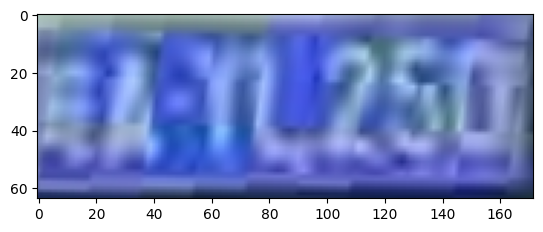

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img0)

In [ ]:
print(txt0)

皖AYL250


In [ ]:
from tqdm import tqdm

In [ ]:
num2vec_dict = {}
counter = 0

for i in tqdm(range(len(names))):
  _, txt = train_helper.item(i)
  for j in txt:
    if j not in num2vec_dict:
      num2vec_dict[j] = counter
      counter += 1

unknown_idx = len(num2vec_dict)

100%|██████████| 199996/199996 [01:36<00:00, 2066.71it/s]


In [ ]:
vec2num_dict = {v: k for k, v in num2vec_dict.items()}

In [ ]:
def num2vec(txt):
  res = []
  for c in txt:
    if c in num2vec_dict:
      res.append(num2vec_dict[c])
    else:
      res.append(unknown_idx)
  return(res)

In [ ]:
def vec2num(vec):
  res = ''
  for c in vec:
    if c in vec2num_dict:
      res += vec2num_dict[c]
    else:
      res += '?'
  return(res)

In [ ]:
vec2num(num2vec(txt0))

'皖AYL250'

array([[[175, 198, 188],
        [174, 197, 187],
        [173, 196, 186],
        ...,
        [120, 135, 174],
        [119, 136, 171],
        [118, 135, 168]],

       [[173, 196, 189],
        [172, 194, 188],
        [170, 192, 186],
        ...,
        [119, 134, 176],
        [116, 132, 171],
        [110, 126, 161]],

       [[171, 193, 190],
        [169, 191, 188],
        [167, 189, 186],
        ...,
        [119, 133, 178],
        [112, 127, 169],
        [100, 115, 154]],

       ...,

       [[ 72,  84, 140],
        [ 74,  87, 144],
        [ 76,  89, 148],
        ...,
        [ 39,  55,  89],
        [ 38,  54,  86],
        [ 36,  53,  83]],

       [[ 39,  52, 103],
        [ 36,  50, 102],
        [ 38,  53, 105],
        ...,
        [ 33,  50,  76],
        [ 33,  51,  74],
        [ 33,  51,  73]],

       [[ 30,  44,  91],
        [ 29,  44,  90],
        [ 28,  45,  90],
        ...,
        [ 29,  48,  65],
        [ 30,  49,  64],
        [ 31,  50,  64]]], dtype=uint8)
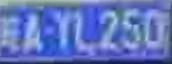

In [ ]:
img0

In [ ]:
import pandas as pd
data = []

for i in tqdm(range(len(names))):
  img, txt = train_helper.item(i)
  line = [img] + num2vec(txt)
  data.append(line)

train_dataset = pd.DataFrame(data,columns=['img', 'char1', 'char2', 'char3', 'char4', 'char5', 'char6', 'char7'])

100%|██████████| 199996/199996 [02:19<00:00, 1437.99it/s]


In [ ]:
import cv2
import torch
from torch.utils.data import Dataset

class NumDataset(Dataset):
    def __init__(
        self,
        dataset,
        with_points=False,
        transform=None,
    ):
        if with_points:
          self.ann_df = dataset
          columns = ['img', 'char1', 'char2', 'char3', 'char4', 'char5', 'char6', 'char7']
        else:
          self.ann_df = dataset
          columns = []
        self.ann_df["img_width"] = [0] * len(self.ann_df)
        self.ann_df["img_height"] = [0] * len(self.ann_df)
        self.transform = transform
        self.feature_columns = columns[1:]


    def __len__(self):
        return self.ann_df.shape[0]

    def __getitem__(self, index):
        row = self.ann_df.iloc[index]
        image = row["img"]
        h, w, _ = image.shape
        self.ann_df.loc[index, "img_width"] = w
        self.ann_df.loc[index, "img_height"] = h
        if len(self.feature_columns) > 0:
            features = row[self.feature_columns].values.astype(np.int64)
        if self.transform:
            if len(self.feature_columns) > 0:
                transformed = self.transform(image=image)
                image = transformed["image"]
                features = torch.from_numpy(features).to(torch.int64)
            else:
                transformed = self.transform(image=image)
                image = transformed["image"]

        if len(self.feature_columns) > 0:
            return image, features
        else:
            return image, None

In [ ]:
import albumentations as A

observation_transform = A.Compose(
    [
        A.Flip(1),
    ]
)

# observation_train = NumDataset(train_dataset, with_points=True,transform=None)

皖AYL250


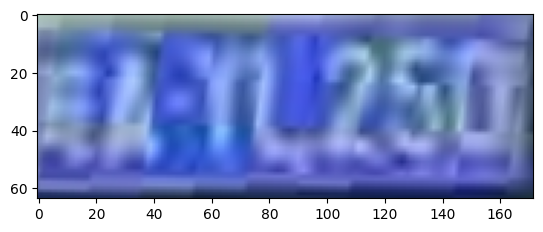

皖AH2T95


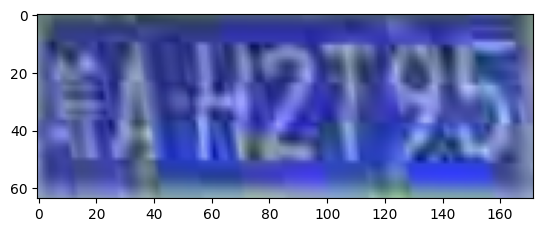

皖APS969


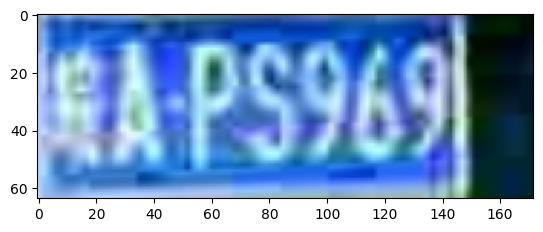

皖ADX640


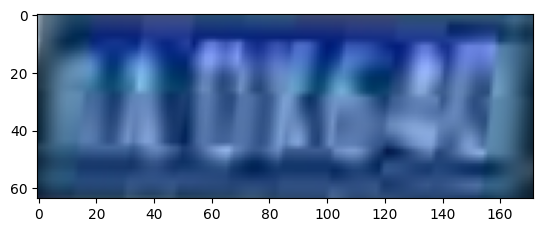

皖AK9954


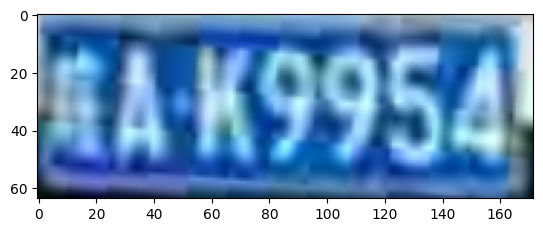

In [ ]:
i = 0
for img, labels in observation_train:
    plt.imshow(img)
    print(vec2num(labels))
    plt.show()
    if i > 3:
        break
    i+= 1

In [ ]:
from albumentations.pytorch import ToTensorV2

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# DEVICE = "cpu"

MEAN = (0.4914, 0.4822, 0.4465)
STD = (0.2023, 0.1994, 0.2010)

TRAIN_SUBPART = 1.0
VAL_SPLIT = 0.25

BATCH_SIZE = 1024
MAX_EPOCHS = 10
# BASE_LR = 1e-1 #- для 1-ой модели
# BASE_LR = 1e-2 # - для второй модели
BASE_LR = 1e-3 # - попытка доучить вторую модель


DEFAULT_TRANSFORM = A.Compose(
    [
        # A.Flip(),
        A.Normalize(mean=MEAN, std=STD),
        ToTensorV2(),
    ]
)

In [ ]:
# !pip install pytorch_lightning

In [ ]:
import pytorch_lightning as pl
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
from pytorch_lightning.callbacks import Callback, ModelCheckpoint, LearningRateMonitor
from torchvision import models
import torch.nn.functional as F


class KeypointDataModule(pl.LightningDataModule):
    def __init__(
        self,
        dataset,
        batch_size=BATCH_SIZE,
        train_transform=DEFAULT_TRANSFORM,
    ):
        super().__init__()

        self.batch_size = batch_size

        self.train_set = NumDataset(
            dataset = dataset,
            with_points = True,
            transform = train_transform
        )

        indices = list(range(len(self.train_set)))
        np.random.shuffle(indices)
        indices = indices[: int(round(len(indices) * TRAIN_SUBPART))]
        split = int(round(VAL_SPLIT * len(indices)))

        self.train_sampler = SubsetRandomSampler(indices[split:])
        self.val_sampler = SubsetRandomSampler(indices[:split])

    def setup(self, stage):
        print(
            f"Train: {len(self.train_sampler)} images\n"
            f"Validation: {len(self.val_sampler)} images"
        )

    def train_dataloader(self):
        return torch.utils.data.DataLoader(
            self.train_set,
            sampler=self.train_sampler,
            batch_size=self.batch_size,
        )

    def val_dataloader(self):
        return torch.utils.data.DataLoader(
            self.train_set,
            sampler=self.val_sampler,
            batch_size=self.batch_size,
        )

    def test_dataloader(self):
        return torch.utils.data.DataLoader(
            self.train_set,
            sampler=self.val_sampler,
            batch_size=self.batch_size,
        )


from torchvision import datasets, models, transforms
class EfNetKeyPoinModel(pl.LightningModule):
    def __init__(self, transfer=True, freeze="most"):
        super().__init__()
        self.cnn_model = models.resnet18(
            weights=models.ResNet18_Weights.DEFAULT
        )

        linear_size = 512
        self.cnn_model.fc = nn.Identity()
        self.linears = nn.ModuleList([nn.Linear(linear_size, 512) for _ in range(7)])
        self.lstm = nn.LSTM(512, 128, num_layers=1, batch_first=True, bidirectional=True)
        self.classifier = nn.Sequential(
            nn.Linear(256, 100),
            nn.ReLU(),
            nn.Linear(100, len(vec2num_dict))
        )

    def forward(self, x):
        x = self.cnn_model(x)
        lstm_input = [self.linears[i](x).unsqueeze(1) for i in range(7)]
        lstm_input = torch.cat(lstm_input, dim=1)
        x, _ = self.lstm(lstm_input)
        out = self.classifier(x)
        return out.permute([0, 2, 1])



class KeyPointTrainingModule(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = EfNetKeyPoinModel(len(num2vec_dict))
        self.train_loss = []
        self.val_loss = []
        self.loss_func = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y_gt = batch
        y_pr = self.model(x)
        loss = self.loss_func(y_pr, y_gt)
        self.train_loss.append(loss.detach().cpu())
        return loss

    def configure_optimizers(self):
        self.optimizer = torch.optim.AdamW(self.parameters(), lr=BASE_LR, weight_decay=5e-2)
        self.reduce_lr_on_plateau = {
            "scheduler": torch.optim.lr_scheduler.ReduceLROnPlateau(
                self.optimizer,
                factor=0.5,
                patience=2,
                min_lr=1e-7,
                verbose=True
            ),
            "monitor": "val_loss",
            "interval": "epoch"
        }
        return [self.optimizer], [self.reduce_lr_on_plateau]

    def on_train_epoch_end(self):
        ## display average loss across epoch
        avg_loss = torch.stack(self.train_loss).mean()
        print(
            f"Epoch {self.trainer.current_epoch}, "
            f"Train_loss: {round(float(avg_loss), 5)}",
        )
        # don't forget to clear the saved losses
        self.train_loss.clear()

    def on_train_epoch_end(self):
        ## display average loss across epoch
        avg_loss = torch.stack(self.train_loss).mean()
        # avg_mse = torch.stack(self.train_mse).mean()
        print(
            f"\nEpoch {self.trainer.current_epoch}, "
            # f"Train_mse: {round(float(avg_mse), 5)}, "
            f"Train_loss: {round(float(avg_loss), 5)}",
        )
        # don't forget to clear the saved losses
        self.train_loss.clear()

    def on_validation_epoch_end(self):
        ## display average loss across epoch
        avg_loss = torch.stack(self.val_loss).mean()
        # avg_mse = torch.stack(self.val_mse).mean()
        print(
            f"\nEpoch {self.trainer.current_epoch}, "
            # f"Val_mse: {round(float(avg_mse), 5)}, "
            f"Val_loss: {round(float(avg_loss), 5)} "
        )
        # don't forget to clear the saved losses
        self.val_loss.clear()

    def validation_step(self, batch, batch_idx):
        """the full validation loop"""
        x, y_gt = batch
        y_pr = self.model(x)
        # print(y_pr.shape, y_gt.shape)
        # print('-----------')
        # print(y_pr)
        # print('-----------')
        # print(y_gt)
        loss = self.loss_func(y_pr, y_gt)
        self.val_loss.append(loss.detach().cpu())

        # mse = self.mse(y_pr, y_gt).detach().cpu()
        # self.val_mse.append(mse)

        metrics = {"val_loss": loss}

        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=False)
        return metrics


def train_detector(dataset):
    data_module = KeypointDataModule(
        dataset = dataset,
        batch_size=BATCH_SIZE,
        train_transform=DEFAULT_TRANSFORM,
    )

    model = KeyPointTrainingModule()

    checkpoint_callback = ModelCheckpoint(
        dirpath="/content/drive/MyDrive/task2_checkpoints",
        filename="{epoch}",
        monitor="val_loss",
        mode="min",
        save_top_k=1,
        save_last=1,
    )

    trainer = pl.Trainer(
        callbacks=[checkpoint_callback],
        max_epochs=MAX_EPOCHS,
        accelerator=DEVICE,
        devices=1,
        enable_progress_bar=False,
        gradient_clip_val=1
    )
    trainer.fit(model, data_module)
    return model

In [ ]:
model = train_detector(train_dataset)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Train: 149997 images
Validation: 49999 images


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params
------------------------------------------------
0 | model     | EfNetKeyPoinModel | 13.7 M
1 | loss_func | CrossEntropyLoss  | 0     
------------------------------------------------
13.7 M    Trainable params
0         Non-trainable params
13.7 M    Total params
54.819    Total estimated model params size (MB)



Epoch 0, Val_loss: 4.18031 

Epoch 0, Val_loss: 0.07796 

Epoch 0, Train_loss: 1.03671

Epoch 1, Val_loss: 0.02155 

Epoch 1, Train_loss: 0.03537

Epoch 2, Val_loss: 0.01865 

Epoch 2, Train_loss: 0.01443

Epoch 3, Val_loss: 0.01112 

Epoch 3, Train_loss: 0.01097

Epoch 4, Val_loss: 0.00952 

Epoch 4, Train_loss: 0.00746

Epoch 5, Val_loss: 0.0088 

Epoch 5, Train_loss: 0.00701

Epoch 6, Val_loss: 0.00687 

Epoch 6, Train_loss: 0.00594

Epoch 7, Val_loss: 0.00725 

Epoch 7, Train_loss: 0.00387

Epoch 8, Val_loss: 0.01023 

Epoch 8, Train_loss: 0.00405

Epoch 9, Val_loss: 0.00573 

Epoch 9, Train_loss: 0.00314


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
model = KeyPointTrainingModule.load_from_checkpoint(
    "/content/drive/MyDrive/task2_checkpoints/epoch=9.ckpt",
    map_location = DEVICE,
)

In [ ]:
test_path = r'/content/CCPD/test.lmdb'
pred_path = './pred.txt'

In [ ]:
test_reader = LMDBReader(test_path)
test_reader.open()
test_helper = CCPDHelper(test_reader)

In [ ]:
test_names = test_reader.namelist()

In [ ]:
import pandas as pd
data = []

for i in tqdm(range(len(test_names))):
  img, txt = test_helper.item(i)
  line = [img] + num2vec(txt)
  data.append(line)

test_dataset = pd.DataFrame(data,columns=['img', 'char1', 'char2', 'char3', 'char4', 'char5', 'char6', 'char7'])

100%|██████████| 20052/20052 [00:09<00:00, 2039.55it/s]


In [ ]:
def inference(trained_model, images_path):
    trained_model.eval().to(DEVICE)
    dataset = NumDataset(images_path, with_points=False, transform=DEFAULT_TRANSFORM)
    res_dict = []
    for i, (img_tensor, _) in tqdm(
        enumerate(dataset), desc="inference", total=len(dataset)
    ):
        img_tensor = img_tensor.unsqueeze(0).to(DEVICE)
        with torch.no_grad():
          pred_vec_prob = model(img_tensor).squeeze(0).detach().cpu().numpy()
          pred_vec = np.argmax(pred_vec_prob, axis=0)

        res_dict.append(vec2num(pred_vec.astype(int)))
        # res_dict.append(pred_vec)
    return res_dict

In [ ]:
preds = inference(model, test_dataset)

inference: 100%|██████████| 20052/20052 [01:38<00:00, 202.94it/s]


In [ ]:
preds[188]

'皖A62942'

In [ ]:
with open(pred_path, 'w', encoding='utf-8') as out:
  for i in range(len(preds)):
    print(i, preds[i], file=out)

In [ ]:
from course_ocr_t2.evaluate import evaluate
print(evaluate('gt.txt', 'pred.txt') * 100)

97.45020090621527


In [ ]:
!cp /content/course_ocr/task2/pred.txt /content/drive/MyDrive/task2_checkpoints/pred.txt